
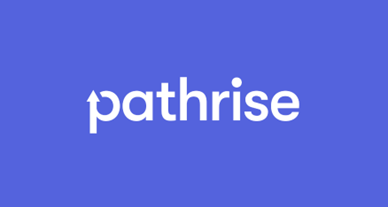

## Data Challenge Assignment 
#### Pathrise is an online program that provides 1-on-1 mentorship, training, and advice to help job seekers get the best possible jobs in tech. Every two weeks, Pathrise welcomes a new cohort of fellows. If a candidate is interested in joining our program and successfully passes all stages of our admission process, they receive an offer to join Pathrise and become a fellow

On average, for fellows who stay with us after their free trial period, it takes about 4 months to receive a final job offer. However, there is a lot of variation in fellows’ outcomes. Being able to predict how fast every single fellow is going to find a job is crucial for our business. In this exercise we provide you with a sample of information we collected from our fellows from the moment they joined our program. 

##### The main goal of your analysis is to derive insights around if a fellow will ultimately be placed at a company and how long until a placement can be expected.

## Objectives

Perform exploratory Data Analysis and Feature Engineering using `Pandas` and `Matplotlib`

*   Exploratory Data Analysis
*   Preparing Data  Feature Engineering

### Import Libraries and Define Auxiliary Functions

In [1]:
# pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
#NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns

## Exploratory Data Analysis
First, let's read the Pathrise dataset into a Pandas dataframe and print its summary

In [2]:
import os

In [3]:
os.getcwd()

'C:\\Users\\nasim\\Pathrise Project'

In [4]:
df= pd.read_excel('Data_Pathrise.xlsx', engine='openpyxl')

In [5]:
df.head()

,id,pathrise_status,primary_track,cohort_tag,program_duration_days,placed,employment_status,highest_level_of_education,length_of_job_search,biggest_challenge_in_search,professional_experience,work_authorization_status,number_of_interviews,number_of_applications,gender,race
0,1,Active,SWE,OCT19A,NaN,0,Unemployed,Bachelor's Degree,3-5 months,Hearing back on my applications,3-4 years,Canada Citizen,2.0,900,Male,Non-Hispanic White or Euro-American
1,2,Active,PSO,JAN20A,NaN,0,Unemployed,"Some College, No Degree",3-5 months,Getting past final round interviews,1-2 years,Citizen,6.0,0,Male,Non-Hispanic White or Euro-American
2,3,Closed Lost,Design,AUG19B,0.0,0,Employed Part-Time,Master's Degree,Less than one month,Figuring out which jobs to apply for,Less than one year,Citizen,0.0,0,Male,East Asian or Asian American
3,4,Closed Lost,PSO,AUG19B,0.0,0,Contractor,Bachelor's Degree,Less than one month,Getting past final round interviews,Less than one year,Citizen,5.0,25,Male,Decline to Self Identify
4,5,Placed,SWE,AUG19A,89.0,1,Unemployed,Bachelor's Degree,1-2 months,Hearing back on my applications,1-2 years,F1 Visa/OPT,10.0,100,Male,East Asian or Asian American


### To remove the space inside the quotation

In [6]:
df.columns= df.columns.str.rstrip()

### number_of_interviews VS program_duration_days variables would affect the Placed.

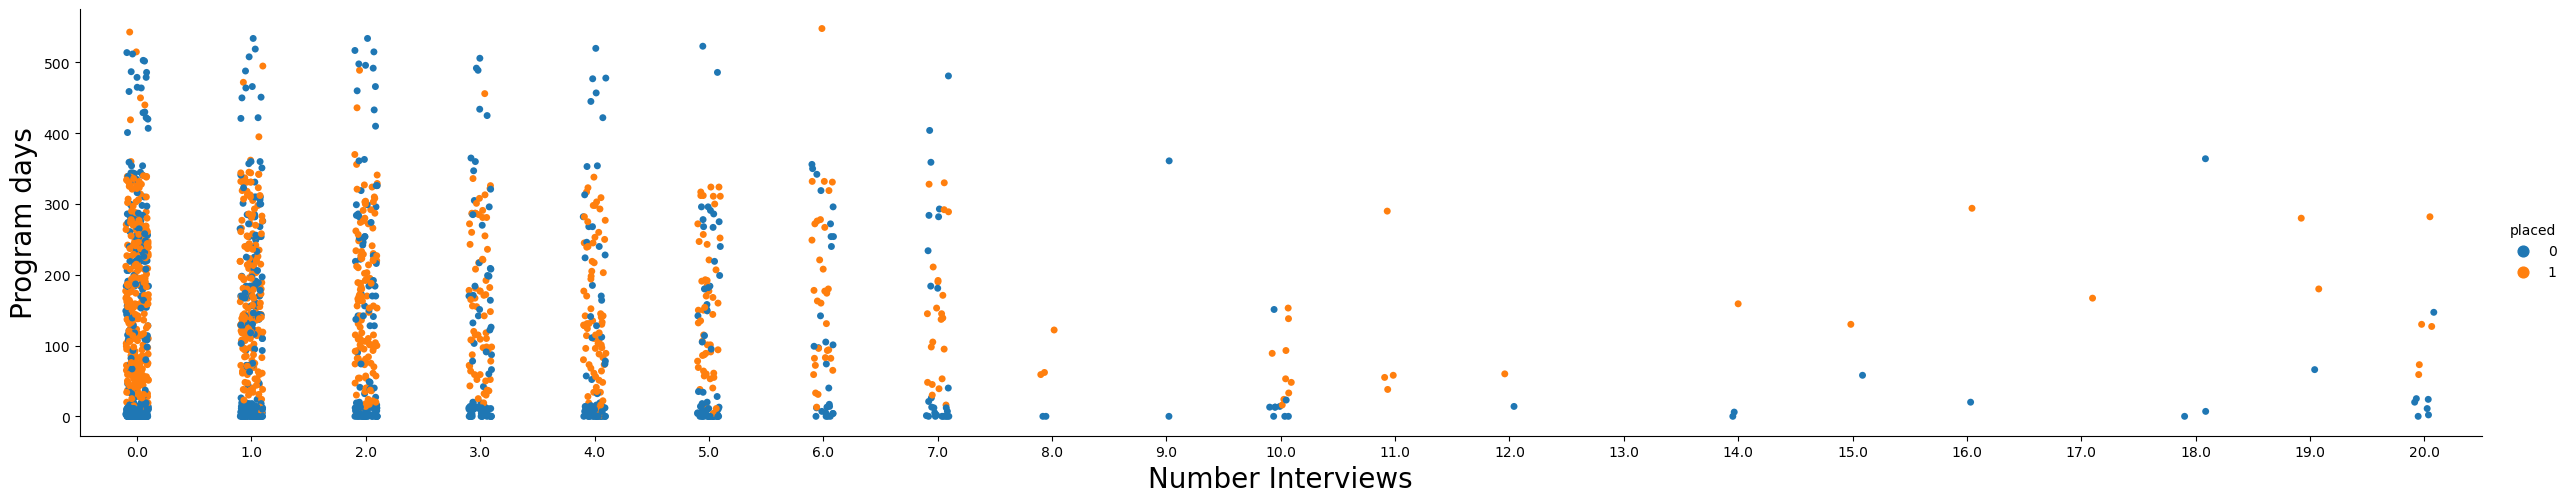

In [7]:
sns.catplot(x='number_of_interviews', y='program_duration_days', hue='placed', data=df, aspect=5)
plt.xlabel("Number Interviews",fontsize=20)
plt.ylabel("Program days",fontsize=20)
plt.show()

####  Number of highest_level_of_education

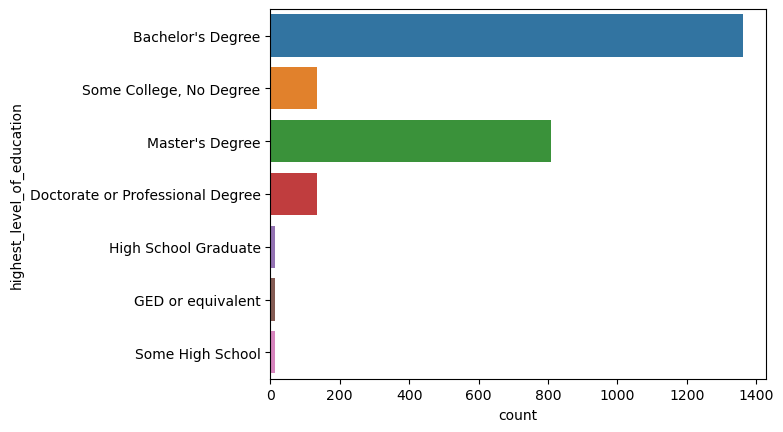

In [8]:
sns.countplot(y= 'highest_level_of_education', data=df,  orient='v')
plt.show()

#### Number of professional_experience
It seems logical that people who have little experience should participate in our programs, people with experience do not need this program.

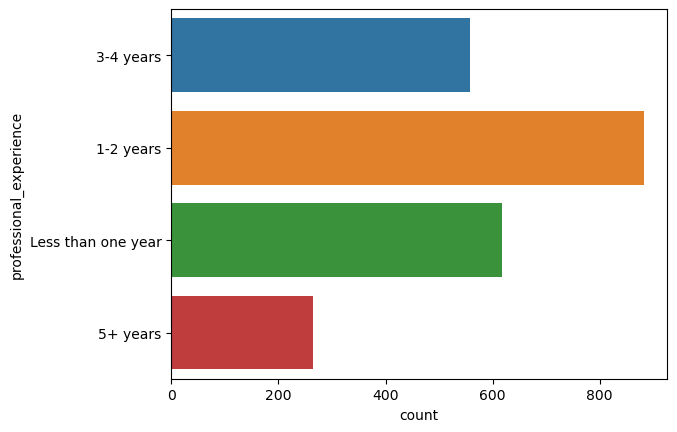

In [9]:
sns.countplot(y= 'professional_experience', data=df,  orient='v')
plt.show()

#### Number of pathrise_status
I'll remove this column because the placed feature is marked with 1 and the active feature in the placed column is marked with 0, the rest indicate exiting the program.

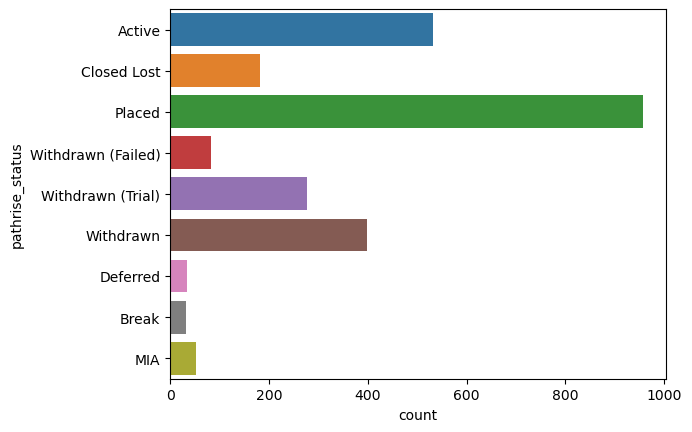

In [10]:
sns.countplot(y= 'pathrise_status', data=df,  orient='h')
plt.show()

In [11]:
df['pathrise_status'].value_counts()

Placed                956
Active                532
Withdrawn             398
Withdrawn (Trial)     276
Closed Lost           182
Withdrawn (Failed)     82
MIA                    52
Deferred               34
Break                  32
Name: pathrise_status, dtype: int64

#### I believe that this column has no effect on being placed so I'll remove it

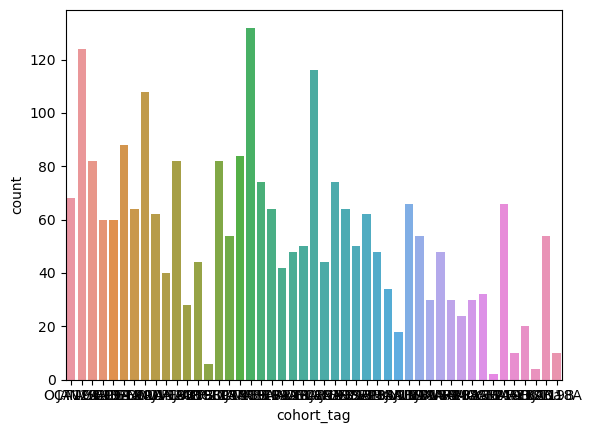

In [12]:
sns.countplot(x= 'cohort_tag', data=df)
plt.show()

In [13]:
print(set(df['cohort_tag']))

{'MAY19B', nan, 'SEP18A', 'SEP18B', 'APR20A', 'MAR20A', 'NOV18A', 'JAN18A', 'OCT18B', 'FEB20A', 'OCT19B', 'FEB19B', 'JAN19B', 'APR19B', 'MAR19B', 'APR18B', 'NOV19B', 'SEP19A', 'MAY18A', 'FEB19A', 'OCT18A', 'AUG19A', 'NOV19A', 'APR19A', 'OCT21A', 'FEB20B', 'DEC18A', 'JUN19B', 'SEP19B', 'APR18A', 'MAR18A', 'AUG19B', 'JUN18A', 'JUL19A', 'JAN20A', 'FEB20a', 'DEC19A', 'AUG18A', 'JUL19B', 'JAN19A', 'MAY19A', 'JUN19A', 'OCT19A', 'JAN20B', 'AUG19C', 'MAR19A', 'FEB18A', 'SEP18C'}


### Number of employment_status
It makes sense,Students and unemployed people are more willing to participate in the program

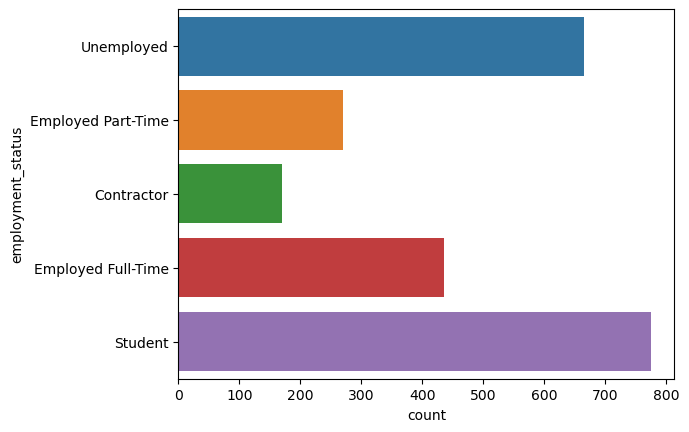

In [15]:
sns.countplot(y= 'employment_status', data=df)
plt.show()

### Number of length_of_job_search

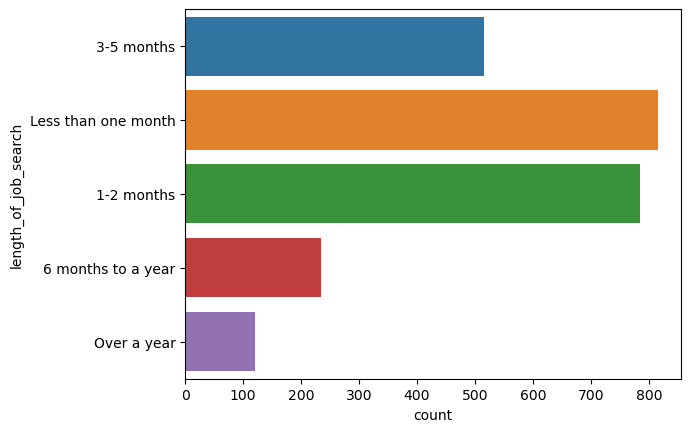

In [16]:
sns.countplot(y= 'length_of_job_search', data=df)
plt.show()

### Number of Race

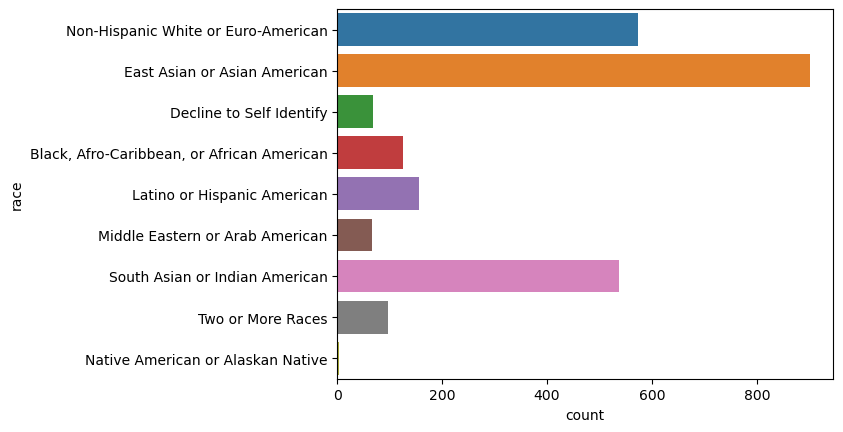

In [17]:
sns.countplot(y= 'race', data=df)
plt.show()

### Number of Gender

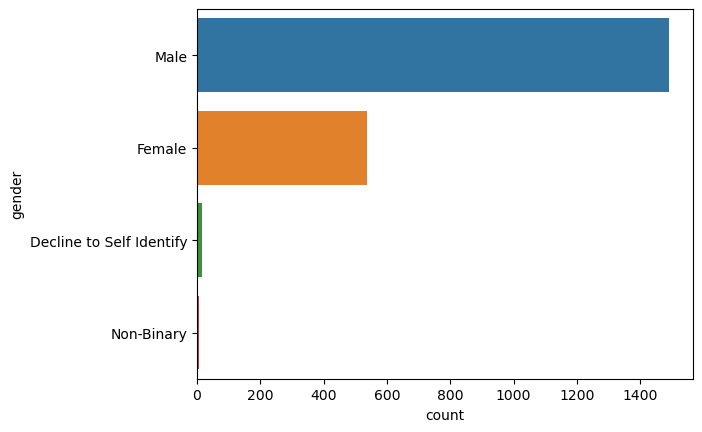

In [18]:
sns.countplot(y= 'gender', data=df)
plt.show()

### Number of placed
There is an imbalance

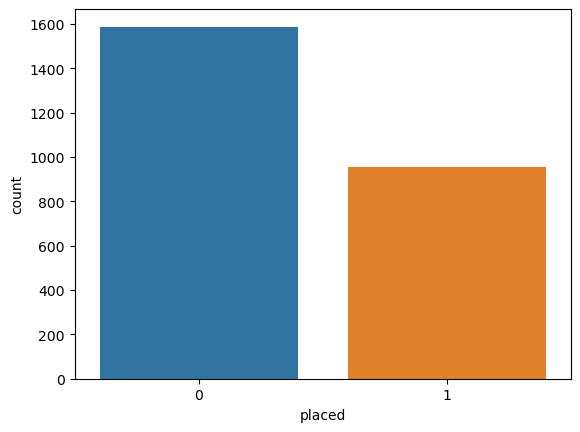

In [19]:
sns.countplot(x= 'placed', data=df)
plt.show()

### Number of length_of_job_search

In [20]:
df_count=df['length_of_job_search'].value_counts()
df_count

Less than one month    815
1-2 months             785
3-5 months             515
6 months to a year     235
Over a year            120
Name: length_of_job_search, dtype: int64

In [21]:
count=list(df_count.values)
index=list(df_count.index)

In [22]:
print(count)
print(index)

[815, 785, 515, 235, 120]
['Less than one month', '1-2 months', '3-5 months', '6 months to a year', 'Over a year']


### The percentage of job_search_length by Pie Chart

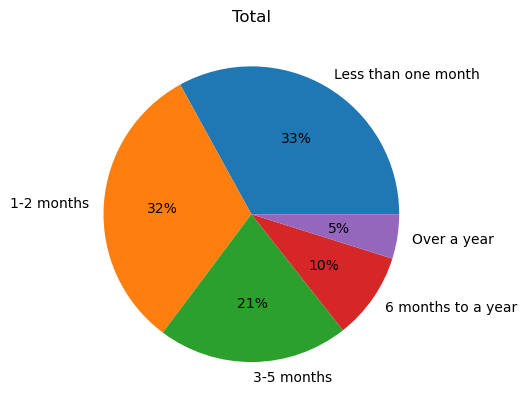

In [23]:
plt.pie(count,labels=index, autopct='%.0f%%')
plt.title('Total')
plt.show()

### Classification of plased and non-plased data

In [24]:
df_placed= df[df['placed']==1]
df_unplaced= df[df['placed']!=1]

### The percentage of job_search_length "placed" by Pie Chart

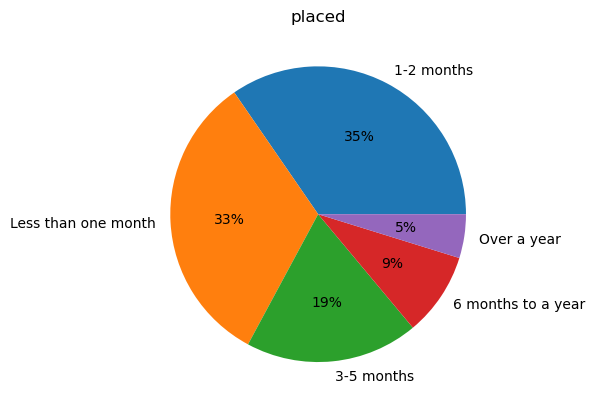

In [25]:
df_count_placed=df_placed['length_of_job_search'].value_counts()
count_placed=list(df_count_placed.values)
index_placed=list(df_count_placed.index)
plt.pie(count_placed,labels=index_placed, autopct='%.0f%%')
plt.title('placed')
plt.show()

In [26]:
df_count_placed

1-2 months             318
Less than one month    299
3-5 months             174
6 months to a year      84
Over a year             44
Name: length_of_job_search, dtype: int64

### Number of Gender that placed

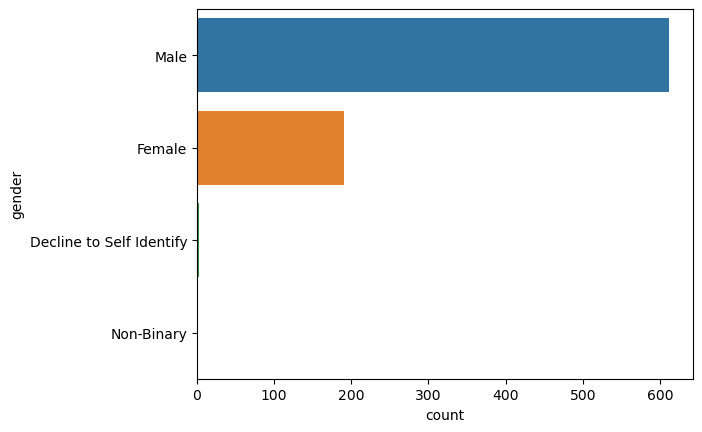

In [27]:
sns.countplot(y= 'gender', data=df_placed)
plt.show()

### Number of highest_level_of_education that placed

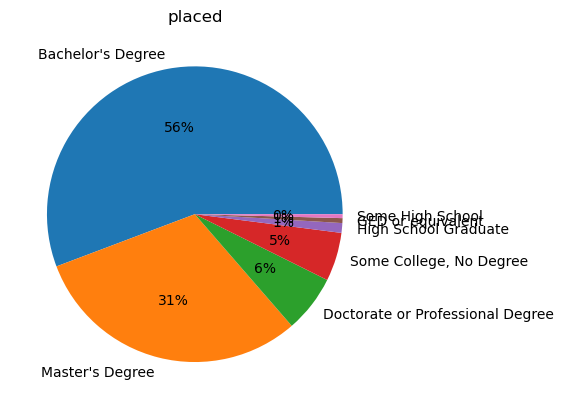

In [28]:
df_count_placed=df_placed['highest_level_of_education'].value_counts()
count_placed=list(df_count_placed.values)
index_placed=list(df_count_placed.index)
plt.pie(count_placed,labels=index_placed, autopct='%.0f%%')
plt.title('placed')
plt.show()

### Number of professional_experience that placed

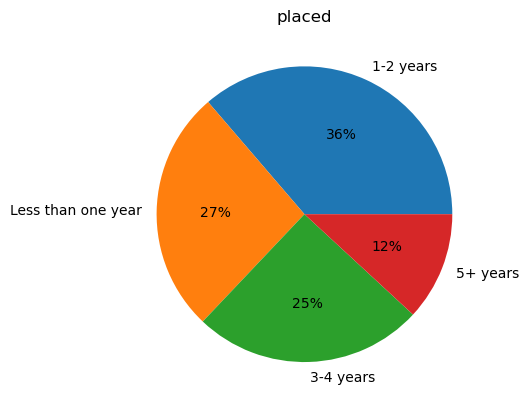

In [29]:
df_count_placed=df_placed['professional_experience'].value_counts()
count_placed=list(df_count_placed.values)
index_placed=list(df_count_placed.index)
plt.pie(count_placed,labels=index_placed, autopct='%.0f%%')
plt.title('placed')
plt.show()

### Features Engineering
By now, you should obtain some preliminary insights about how each important variable would affect the success rate, we will select the features that will be used in success prediction in the future module.

In [30]:
df.head()

,id,pathrise_status,primary_track,cohort_tag,program_duration_days,placed,employment_status,highest_level_of_education,length_of_job_search,biggest_challenge_in_search,professional_experience,work_authorization_status,number_of_interviews,number_of_applications,gender,race
0,1,Active,SWE,OCT19A,NaN,0,Unemployed,Bachelor's Degree,3-5 months,Hearing back on my applications,3-4 years,Canada Citizen,2.0,900,Male,Non-Hispanic White or Euro-American
1,2,Active,PSO,JAN20A,NaN,0,Unemployed,"Some College, No Degree",3-5 months,Getting past final round interviews,1-2 years,Citizen,6.0,0,Male,Non-Hispanic White or Euro-American
2,3,Closed Lost,Design,AUG19B,0.0,0,Employed Part-Time,Master's Degree,Less than one month,Figuring out which jobs to apply for,Less than one year,Citizen,0.0,0,Male,East Asian or Asian American
3,4,Closed Lost,PSO,AUG19B,0.0,0,Contractor,Bachelor's Degree,Less than one month,Getting past final round interviews,Less than one year,Citizen,5.0,25,Male,Decline to Self Identify
4,5,Placed,SWE,AUG19A,89.0,1,Unemployed,Bachelor's Degree,1-2 months,Hearing back on my applications,1-2 years,F1 Visa/OPT,10.0,100,Male,East Asian or Asian American


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2544 entries, 0 to 2543
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           2544 non-null   int64  
 1   pathrise_status              2544 non-null   object 
 2   primary_track                2544 non-null   object 
 3   cohort_tag                   2536 non-null   object 
 4   program_duration_days        1928 non-null   float64
 5   placed                       2544 non-null   int64  
 6   employment_status            2315 non-null   object 
 7   highest_level_of_education   2486 non-null   object 
 8   length_of_job_search         2470 non-null   object 
 9   biggest_challenge_in_search  2520 non-null   object 
 10  professional_experience      2322 non-null   object 
 11  work_authorization_status    2260 non-null   object 
 12  number_of_interviews         2326 non-null   float64
 13  number_of_applicat

### I delete the columns that do not affect the result

In [32]:
df= df.drop(['id', 'pathrise_status', 'cohort_tag'], axis=1)

##### Now delete N/A on program_duration_days column

In [77]:
#df= df.dropna(subset=['program_duration_days'])

In [33]:
df= df.dropna(axis=0)

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 988 entries, 2 to 2543
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   primary_track                988 non-null    object 
 1   program_duration_days        988 non-null    float64
 2   placed                       988 non-null    int64  
 3   employment_status            988 non-null    object 
 4   highest_level_of_education   988 non-null    object 
 5   length_of_job_search         988 non-null    object 
 6   biggest_challenge_in_search  988 non-null    object 
 7   professional_experience      988 non-null    object 
 8   work_authorization_status    988 non-null    object 
 9   number_of_interviews         988 non-null    float64
 10  number_of_applications       988 non-null    int64  
 11  gender                       988 non-null    object 
 12  race                         988 non-null    object 
dtypes: float64(2), int6

#### Create dummy variables to categorical columns
Use the function get_dummies and features dataframe to apply OneHotEncoder to all odject columns. Assign the value to the variable df_dummy, display the results using the method head. Your result dataframe must include all features including the encoded ones.

In [35]:
df_dummy= pd.get_dummies(df[['primary_track', 'employment_status', 'highest_level_of_education', 'length_of_job_search', 'biggest_challenge_in_search', 'professional_experience', 'work_authorization_status', 'gender', 'race']])

In [36]:
df_dummy.head()

,primary_track_Data,primary_track_Design,primary_track_PSO,primary_track_SWE,primary_track_Web,employment_status_Contractor,employment_status_Employed Full-Time,employment_status_Employed Part-Time,employment_status_Student,employment_status_Unemployed,...,gender_Male,gender_Non-Binary,"race_Black, Afro-Caribbean, or African American",race_Decline to Self Identify,race_East Asian or Asian American,race_Latino or Hispanic American,race_Middle Eastern or Arab American,race_Non-Hispanic White or Euro-American,race_South Asian or Indian American,race_Two or More Races
2,0,1,0,0,0,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0
3,0,0,1,0,0,1,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,1,...,1,0,0,0,1,0,0,0,0,0
5,0,0,0,1,0,0,1,0,0,0,...,1,0,0,0,1,0,0,0,0,0
6,0,0,0,1,0,0,1,0,0,0,...,1,0,1,0,0,0,0,0,0,0


In [37]:
df= df.drop(['primary_track', 'employment_status', 'highest_level_of_education', 'length_of_job_search', 'biggest_challenge_in_search', 'professional_experience', 'work_authorization_status', 'gender', 'race'], axis=1)

In [38]:
df= pd.concat([df, df_dummy], axis=1)

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 988 entries, 2 to 2543
Data columns (total 61 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   program_duration_days                                             988 non-null    float64
 1   placed                                                            988 non-null    int64  
 2   number_of_interviews                                              988 non-null    float64
 3   number_of_applications                                            988 non-null    int64  
 4   primary_track_Data                                                988 non-null    uint8  
 5   primary_track_Design                                              988 non-null    uint8  
 6   primary_track_PSO                                                 988 non-null    uint8  
 7   primary_track_SWE                 

In [85]:
#df=df.dropna(subset=['number_of_interviews'])

In [86]:
#df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1756 entries, 2 to 2543
Data columns (total 63 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   program_duration_days                                             1756 non-null   float64
 1   placed                                                            1756 non-null   int64  
 2   number_of_interviews                                              1756 non-null   float64
 3   number_of_applications                                            1756 non-null   int64  
 4   primary_track_Data                                                1756 non-null   uint8  
 5   primary_track_Design                                              1756 non-null   uint8  
 6   primary_track_Marketing                                           1756 non-null   uint8  
 7   primary_track_PSO                

### Cast all numeric columns to `float64`
Now that our df dataframe only contains numbers cast the entire dataframe to variable type float64

In [40]:
df= df.astype(float)

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 988 entries, 2 to 2543
Data columns (total 61 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   program_duration_days                                             988 non-null    float64
 1   placed                                                            988 non-null    float64
 2   number_of_interviews                                              988 non-null    float64
 3   number_of_applications                                            988 non-null    float64
 4   primary_track_Data                                                988 non-null    float64
 5   primary_track_Design                                              988 non-null    float64
 6   primary_track_PSO                                                 988 non-null    float64
 7   primary_track_SWE                 

### We can now export it to a CSV for the next section

In [90]:
df.to_csv('Pathrise_processedData02.csv')